In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df=pd.read_csv('gdrive/My Drive/Copy of rig_data_cleaned.csv')
display(df.head())
display(df.tail())

,Date Time,Hole Depth,Bit Position,Bit Status,Block Height,Hook Load,ROP - Average,Top Drive RPM,Top Drive Torque,Pump SPM - Total,Pump Pressure,Flow In Rate,Rig Activity,Rig Activity Code,Rig Activity Engine,Rig Activity SubCode,Bit Weight
0,2023-01-15 01:48:46,1.0,1.0,0.0,90.21,47.5,0.0,0.0,0.0,0.0,33.79,0.0,1.0,0.0,0.0,0.0,1.7
1,2023-01-15 01:48:47,1.0,1.0,0.0,90.21,47.4,0.0,0.0,0.0,0.0,32.66,0.0,1.0,0.0,0.0,0.0,1.8
2,2023-01-15 01:48:48,1.0,1.0,0.0,90.21,47.5,0.0,0.0,0.0,0.0,33.67,0.0,1.0,0.0,0.0,0.0,1.7
3,2023-01-15 01:48:49,1.0,1.0,0.0,90.21,47.5,0.0,0.0,0.0,0.0,34.37,0.0,1.0,0.0,0.0,0.0,1.7
4,2023-01-15 01:48:50,1.0,1.0,0.0,90.21,47.5,0.0,0.0,0.0,0.0,34.98,0.0,1.0,0.0,0.0,0.0,1.7


,Date Time,Hole Depth,Bit Position,Bit Status,Block Height,Hook Load,ROP - Average,Top Drive RPM,Top Drive Torque,Pump SPM - Total,Pump Pressure,Flow In Rate,Rig Activity,Rig Activity Code,Rig Activity Engine,Rig Activity SubCode,Bit Weight
2159122,2023-04-09 06:21:09,22872.0,22861.47,0.0,50.0,21.8,0.0,0.0,0.0,0.0,38.32,0.0,1.0,0.0,0.0,0.0,27.8
2159123,2023-04-09 06:21:10,22872.0,22861.47,0.0,50.0,21.8,0.0,0.0,0.0,0.0,37.12,0.0,1.0,0.0,0.0,0.0,27.8
2159124,2023-04-09 06:21:11,22872.0,22861.47,0.0,50.0,21.8,0.0,0.0,0.0,0.0,38.16,0.0,1.0,0.0,0.0,0.0,27.8
2159125,2023-04-09 06:21:12,22872.0,22861.47,0.0,50.0,21.8,0.0,0.0,0.0,0.0,39.89,0.0,1.0,0.0,0.0,0.0,27.8
2159126,2023-04-09 06:21:13,22872.0,22861.47,0.0,50.0,21.8,0.0,0.0,0.0,0.0,39.89,0.0,1.0,0.0,0.0,0.0,27.8


In [4]:
# Define target set
y = df["Rig Activity Code"].ravel()
y[:5]


array([0., 0., 0., 0., 0.])

In [5]:
# Define features set

X = df.copy()
X.drop("Rig Activity Code", axis=1, inplace=True)
X.drop("Rig Activity SubCode", axis=1, inplace=True)
X.drop("Rig Activity Engine", axis=1, inplace=True)
X.drop("Bit Status", axis=1, inplace=True)
X.drop("Date Time", axis=1, inplace=True)
X.head()




,Hole Depth,Bit Position,Block Height,Hook Load,ROP - Average,Top Drive RPM,Top Drive Torque,Pump SPM - Total,Pump Pressure,Flow In Rate,Rig Activity,Bit Weight
0,1.0,1.0,90.21,47.5,0.0,0.0,0.0,0.0,33.79,0.0,1.0,1.7
1,1.0,1.0,90.21,47.4,0.0,0.0,0.0,0.0,32.66,0.0,1.0,1.8
2,1.0,1.0,90.21,47.5,0.0,0.0,0.0,0.0,33.67,0.0,1.0,1.7
3,1.0,1.0,90.21,47.5,0.0,0.0,0.0,0.0,34.37,0.0,1.0,1.7
4,1.0,1.0,90.21,47.5,0.0,0.0,0.0,0.0,34.98,0.0,1.0,1.7


In [6]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [8]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [9]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=78)

In [11]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [12]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [13]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 2", "Actual 3", "Actual 5", "Actual 6"], columns=["Predicted 0", "Predicted 2", "Predicted 3", "Predicted 5", "Predicted 6"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [14]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 2,Predicted 3,Predicted 5,Predicted 6
Actual 0,180749,1,6,16,2209
Actual 2,0,210060,99,6,10
Actual 3,56,14,46590,424,28
Actual 5,52,10,797,40663,558
Actual 6,2458,1,36,554,54385


Accuracy Score : 0.9864111808100308
Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    182981
         2.0       1.00      1.00      1.00    210175
         3.0       0.98      0.99      0.98     47112
         5.0       0.98      0.97      0.97     42080
         6.0       0.95      0.95      0.95     57434

    accuracy                           0.99    539782
   macro avg       0.98      0.98      0.98    539782
weighted avg       0.99      0.99      0.99    539782



In [15]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.17769949510863398, 'ROP - Average'),
 (0.1416261256556046, 'Top Drive Torque'),
 (0.11804636895360829, 'Pump Pressure'),
 (0.11792110302781512, 'Hook Load'),
 (0.09010105694756008, 'Top Drive RPM'),
 (0.0811343563666588, 'Bit Weight'),
 (0.0730811280912281, 'Flow In Rate'),
 (0.0615212010534363, 'Pump SPM - Total'),
 (0.06053123083050494, 'Bit Position'),
 (0.045451635372170986, 'Block Height'),
 (0.032412492912394286, 'Hole Depth'),
 (0.0004738056803844507, 'Rig Activity')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

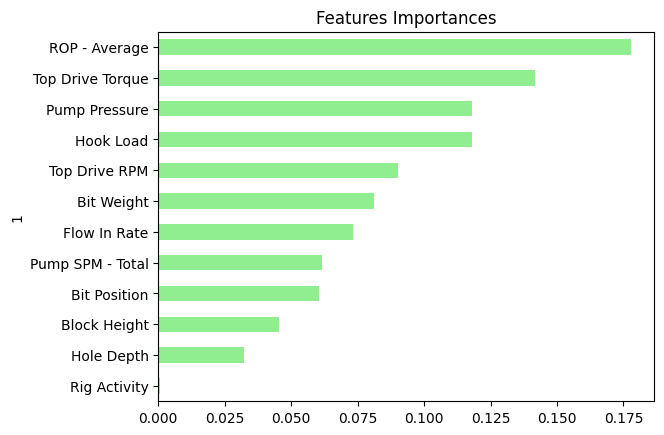

In [16]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)